In [2]:
from util.util_funcs import load_json
import matplotlib.pyplot as plt

sent_evidence_dist = load_json("data/stats/sent_evidence_dist.json")
table_cell_evidence_dist = load_json("data/stats/table_cell_evidence_dist.json")

agg = 0
counter = 0
start = 25
agg_table_cell_evidence_dist = dict()
for key, value in table_cell_evidence_dist.items():
    if int(key) < start: 
        agg_table_cell_evidence_dist[key] = value
        continue
    agg += value

agg_table_cell_evidence_dist[f"{start}+"] = agg

In [ ]:
print(agg_table_cell_evidence_dist)

### Plot the distribution of the evidence

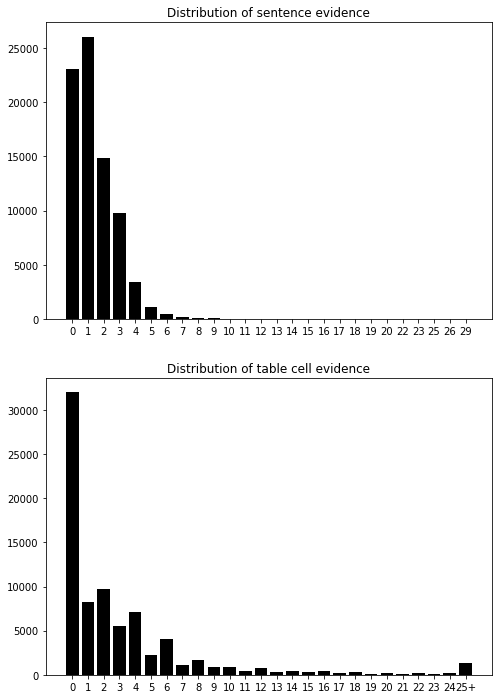

In [3]:
y1 = list(sent_evidence_dist.values())
x1 = list(sent_evidence_dist.keys())
y2 = list(agg_table_cell_evidence_dist.values())
x2 = list(agg_table_cell_evidence_dist.keys())

plt.figure(figsize=(8,12))
plt.subplot(2,1,1)
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.bar(x1,y1)
plt.bar(x1,y1, color="black")
plt.title("Distribution of sentence evidence")


plt.subplot(2,1,2)
# fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
#ax.bar(x2,y2)
plt.bar(x2,y2, color="black")
plt.title("Distribution of table cell evidence")

plt.savefig("data/stats/dist_plot.png")
plt.show()

In [20]:
from collections import defaultdict

corpus_len_dist = load_json("data/stats/corpus_stats.json")

bucket_size = 200
max_bucket = 3000
larger_bucket_size = None
corpus_len_buckets = defaultdict(int)
for key, value in corpus_len_dist.items():
    bucket_nr = int(key) // bucket_size
    if bucket_size*bucket_nr >= 1000:
        bucket_size = 1000
        bucket_nr = int(key) // bucket_size
    if bucket_size*bucket_nr >= max_bucket:
        bucket_key = f"{max_bucket}+"
    else:
        bucket_key = f"{bucket_size*bucket_nr}-{bucket_size*(bucket_nr+1)}"
    corpus_len_buckets[bucket_key] += value

print(dict(corpus_len_buckets))
print(len(corpus_len_buckets.keys()))

{'0-200': 3267272, '200-400': 908355, '400-600': 437455, '600-800': 238871, '800-1000': 145138, '1000-2000': 275076, '2000-3000': 75269, '3000+': 73970}
8


Text(0.5, 1.0, 'Distribution of corpus document lengths')

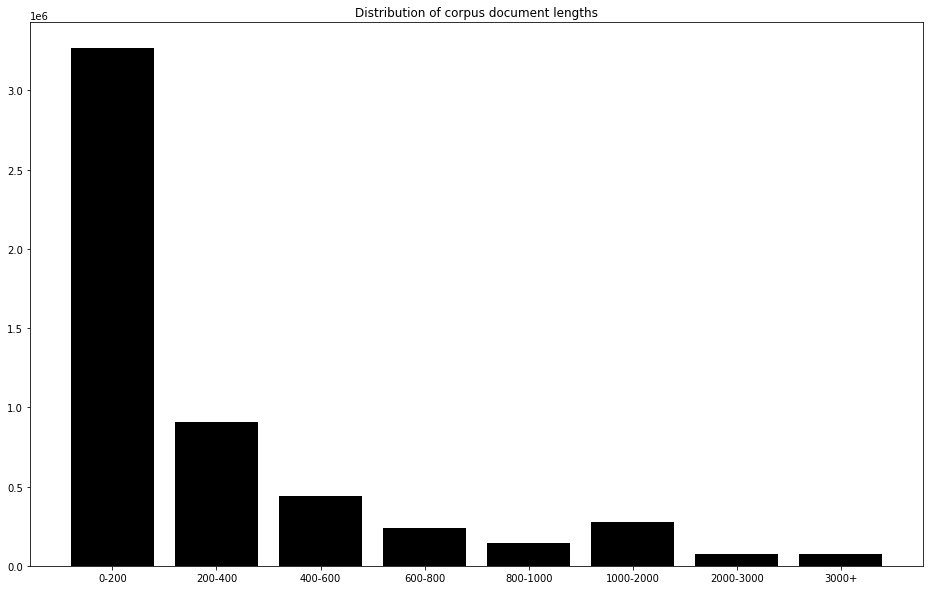

In [21]:
y = list(corpus_len_buckets.values())
x = list(corpus_len_buckets.keys())

plt.figure(figsize=(16,10))
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.bar(x1,y1)
plt.bar(x,y, color="black")
plt.title("Distribution of corpus document lengths")